# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [4]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size.


In [6]:
class Node:
    def __init__(self, prob, symbol=None, left=None, right=None):
        self.prob = prob
        self.symbol = symbol
        self.left = left
        self.right = right

def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities

    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}

    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword
      - keys: symbol as character or string
      - values: associated codeword as a character or a string
      Example: {"A": "10", "B":"0","C":"111","D":"110"}

    """
    
    # Step 1: Create initial list of nodes
    nodes = [Node(prob, symbol) for symbol, prob in probability_dict.items()]

    # Step 2: Manually manage the priority queue
    while len(nodes) > 1:
        # Sort nodes by probability using numpy
        probs = np.array([node.prob for node in nodes])
        sorted_indices = np.argsort(probs)
        nodes = [nodes[i] for i in sorted_indices]

        # Combine two nodes with smallest probabilities
        left = nodes.pop(0)
        right = nodes.pop(0)
        merged = Node(left.prob + right.prob, None, left, right)

        # Add new node back
        nodes.append(merged)

    # Step 3: Traverse the final tree to build the codebook
    def generate_codes(node, prefix="", codebook={}):
        if node.symbol is not None:
            codebook[node.symbol] = prefix
        else:
            generate_codes(node.left, prefix + "0", codebook)
            generate_codes(node.right, prefix + "1", codebook)
        return codebook

    return generate_codes(nodes[0])

probs = {"A": 0.2, "B": 0.2, "C": 0.2, "D": 0.2, "E": 0.2}
codes = Huffman_code(probs)
print(codes)

{'C': '00', 'D': '01', 'E': '10', 'A': '110', 'B': '111'}


### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course.

In [7]:

def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format

    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """

    dictionary = {"": 0}  # Empty string is always index 0
    encoded_sequence = []
    current_phrase = ""
    index = 1  # Start indexing from 1

    for char in sequence:
        new_phrase = current_phrase + char
        if new_phrase not in dictionary:
            # Add new phrase to dictionary
            encoded_sequence.append((dictionary[current_phrase], char))
            dictionary[new_phrase] = index
            index += 1
            current_phrase = ""
        else:
            current_phrase = new_phrase

    # Handle any remaining phrase
    if current_phrase:
        encoded_sequence.append((dictionary.get(current_phrase[:-1], 0), current_phrase[-1]))

    return dictionary, encoded_sequence

s = "ababcbababaaaaaaa"

dictionary, encoded = LZ_online(s)

print("Encoded sequence:", encoded)

print("Final dictionary:")

for k, v in dictionary.items():
    print(f"{v}: '{k}'")


Encoded sequence: [(0, 'a'), (0, 'b'), (1, 'b'), (0, 'c'), (2, 'a'), (5, 'b'), (1, 'a'), (7, 'a'), (1, 'a')]
Final dictionary:
0: ''
1: 'a'
2: 'b'
3: 'ab'
4: 'c'
5: 'ba'
6: 'bab'
7: 'aa'
8: 'aaa'


### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [8]:
def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size

    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer

    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """

    encoded_sequence = []
    i = 0  # Current position in the input string
    
    while i < len(sequence):
        match = (0, 0)  # (offset, length)
        for j in range(max(0, i - window_size), i):
            length = 0
            while (i + length < len(sequence) and
                   sequence[j + length] == sequence[i + length]):
                length += 1
                if j + length >= i:
                    break  # Don't overflow current index
            
            if length > match[1]:
                match = (i - j, length)
        
        # If a match is found
        if match[1] > 0:
            next_char_index = i + match[1]
            next_char = sequence[next_char_index] if next_char_index < len(sequence) else ''
            encoded_sequence.append((match[0], match[1], next_char))
            i += match[1] + 1
        else:
            encoded_sequence.append((0, 0, sequence[i]))
            i += 1

    return encoded_sequence

result = LZ77("abracadabrad", window_size=7)

print("Encoded sequence:")

for triplet in result:
    print(triplet)



Encoded sequence:
(0, 0, 'a')
(0, 0, 'b')
(0, 0, 'r')
(3, 1, 'c')
(5, 1, 'd')
(7, 4, 'd')


In [9]:
# [Locked Cell] Evaluation of your functions by the examiner.
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


In [10]:
# Write here your codes for questions 5 to 16 (you may delete this comment)
# Question 5 :
def compute_char_probabilities(text):
    """
    Count character frequencies and compute probabilities.
    Returns a dictionary: {char: prob}
    """
    total_chars = len(text)
    freq = {}
    for char in text:
        freq[char] = freq.get(char, 0) + 1

    probabilities = {char: count / total_chars for char, count in freq.items()}
    return probabilities


def encode_text_with_huffman(text, huffman_codes):
    """
    Replace each character in the text with its Huffman code.
    """
    return ''.join(huffman_codes[char] for char in text)


def compute_compression_metrics(original_text, encoded_text):
    """
    Compute total encoded length and compression rate.
    """
    original_bits = len(original_text) * 8  # ASCII: 8 bits per char
    compressed_bits = len(encoded_text)
    compression_rate = original_bits / compressed_bits if compressed_bits > 0 else 0
    return compressed_bits, compression_rate

In [11]:
# Step 1: Read file
with open("data/english_text.txt", "r") as file:
    english_text = file.read()

# Step 2: Compute probabilities
probs = compute_char_probabilities(english_text)

# Step 3: Generate Huffman code
huffman_codes = Huffman_code(probs)

# Step 4: Encode text
encoded_text = encode_text_with_huffman(english_text, huffman_codes)

# Step 5: Compute metrics
total_length, compression_rate = compute_compression_metrics(english_text, encoded_text)

print("Total encoded length (bits):", total_length)
print("Compression rate:", compression_rate)


Total encoded length (bits): 239008
Compression rate: 1.9496585888338465


In [12]:
# Question 6 :
def calculate_expected_avg_length(probabilities, huffman_codes):
    """
    Calculates the expected average code length given the probabilities and Huffman code lengths.
    """
    return sum(prob * len(huffman_codes[char]) for char, prob in probabilities.items())

def calculate_entropy(probabilities):
    """
    Calculates the entropy of the source.
    """
    return -sum(prob * np.log2(prob) for prob in probabilities.values())

def calculate_empirical_avg_length(encoded_text, original_text_length):
    """
    Average number of bits per character from the encoded output.
    """
    return len(encoded_text) / original_text_length


In [13]:
expected_avg_len = calculate_expected_avg_length(probabilities, huffman_codes)
entropy = calculate_entropy(probabilities)
empirical_avg_len = calculate_empirical_avg_length(encoded_text, len(english_text))

print("Expected average code length:", round(expected_avg_len, 5))
print("Empirical average code length:", round(empirical_avg_len, 5))
print("Entropy of the source (bits):", round(entropy, 5))

NameError: name 'probabilities' is not defined

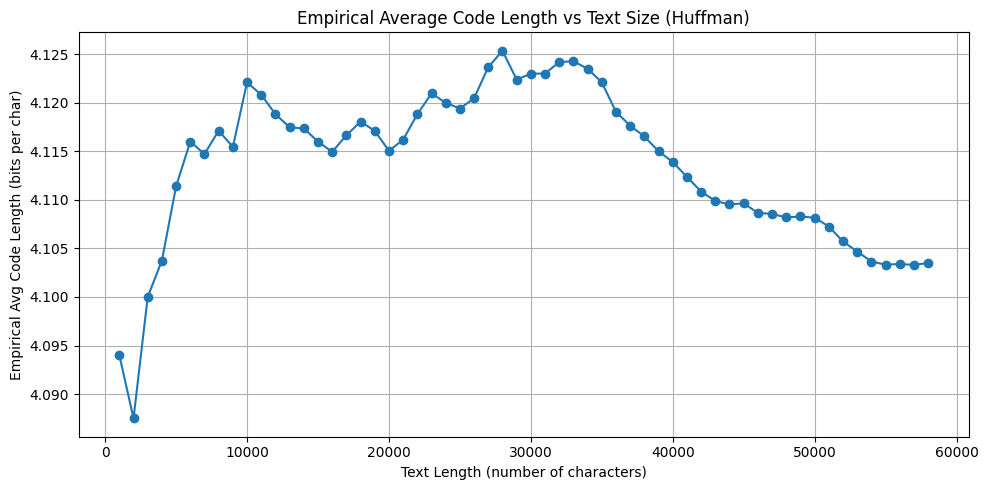

In [14]:
# Question 7 :
import matplotlib.pyplot as plt

chunk_sizes = list(range(1000, len(english_text), 1000))
avg_lengths = []

for size in chunk_sizes:
    chunk = english_text[:size]
    probs_chunk = compute_char_probabilities(chunk)
    huffman_chunk = Huffman_code(probs_chunk)
    encoded_chunk = encode_text_with_huffman(chunk, huffman_chunk)
    avg_len = calculate_empirical_avg_length(encoded_chunk, len(chunk))
    avg_lengths.append(avg_len)

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(chunk_sizes, avg_lengths, marker='o')
plt.title("Empirical Average Code Length vs Text Size (Huffman)")
plt.xlabel("Text Length (number of characters)")
plt.ylabel("Empirical Avg Code Length (bits per char)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Decomment this next line in case you want to save the plot for the report
#plt.savefig("empirical_avg_code_length.png")

In [34]:
# Question 8 :

import math

# Run LZ78 on the text
lz_dict, lz_encoded = LZ_online(english_text)

# Determine bit size for indices
max_index = len(lz_dict)
index_bits = math.ceil(math.log2(max_index)) if max_index > 1 else 1

# Each pair = index + character → index_bits + 5
pair_bits = index_bits + 5
total_bits = len(lz_encoded) * pair_bits

# Original size in bits
original_bits = len(english_text) * 8
compression_rate = original_bits / total_bits

print("Total encoded length (bits):", total_bits)
print("Compression rate:", compression_rate)

Total encoded length (bits): 233396
Compression rate: 1.9965380726319217


In [41]:
# Question 9 :
'Since the sliding window size is 7, both the offset and the match length are limited to 7 values each. '
'Hence, each requires 3 bits. The next symbol is encoded in 5 bits (to cover 26 letters + space), '
'giving 11 bits per triplet in total.'


lz77_encoded = LZ77(english_text, window_size=7)

# Each triplet uses 11 bits (as explained)
bits_per_triplet = 3 + 3 + 5
total_bits_lz77 = len(lz77_encoded) * bits_per_triplet
compression_rate_lz77 = original_bits / total_bits_lz77

print("Total encoded length (bits):", total_bits_lz77)
print("Compression rate:", compression_rate_lz77)


Total encoded length (bits): 441364
Compression rate: 1.0557816224250278


In [40]:
#Question 11:
# Step 1: LZ77 encoding
lz77_encoded = LZ77(english_text, window_size=7)

# Step 2: Extract next_char values
next_chars = ''.join(triplet[2] for triplet in lz77_encoded if triplet[2] != '')

# Step 3: Huffman coding for next_char symbols
next_char_probs = compute_char_probabilities(next_chars)
next_char_huffman = Huffman_code(next_char_probs)
encoded_next_chars = encode_text_with_huffman(next_chars, next_char_huffman)

# Step 4: Total bits = 6 bits per triplet for offset/length + Huffman bits for next_char
metadata_bits = len(lz77_encoded) * 6
total_bits_combined = metadata_bits + len(encoded_next_chars)

# Step 5: Compression rate
original_bits = len(english_text) * 8
compression_rate_combined = original_bits / total_bits_combined

# Output
print("Number of triplets:", len(lz77_encoded))
print("Total Huffman-encoded next_char bits:", len(encoded_next_chars))
print("Total encoded length (bits):", total_bits_combined)
print("Compression rate:", compression_rate_combined)

Number of triplets: 40124
Total Huffman-encoded next_char bits: 174301
Total encoded length (bits): 415045
Compression rate: 1.122731270103242


In [ ]:
#Question 12:
window_sizes = list(range(1, 11001, 1000))

lz77_lengths = []
lz77_rates = []

combined_lengths = []
combined_rates = []

# Reuse LZ78 once to compare later
lz78_dict, lz78_encoded = LZ_online(english_text)
lz78_index_bits = math.ceil(math.log2(len(lz78_dict))) if len(lz78_dict) > 1 else 1
lz78_total_bits = len(lz78_encoded) * (lz78_index_bits + 5)
lz78_rate = (len(english_text) * 8) / lz78_total_bits

for w in window_sizes:
    # -- LZ77 Only --
    triplets = LZ77(english_text, window_size=w)
    bits_per_triplet = 3 + 3 + 5  # fixed fields
    total_lz77 = len(triplets) * bits_per_triplet
    rate_lz77 = (len(english_text) * 8) / total_lz77
    lz77_lengths.append(total_lz77)
    lz77_rates.append(rate_lz77)

    # -- LZ77 + Huffman --
    next_chars = ''.join(t[2] for t in triplets if t[2] != '')
    if next_chars:
        next_probs = compute_char_probabilities(next_chars)
        huff = Huffman_code(next_probs)
        encoded = encode_text_with_huffman(next_chars, huff)
        total_combined = len(triplets) * 6 + len(encoded)
        rate_combined = (len(english_text) * 8) / total_combined
    else:
        total_combined = len(triplets) * 6
        rate_combined = (len(english_text) * 8) / total_combined

    combined_lengths.append(total_combined)
    combined_rates.append(rate_combined)

# Print summary
print("LZ78 total bits:", lz78_total_bits)
print("LZ78 compression rate:", lz78_rate)
print("\nWindow\tLZ77_bits\tLZ77_rate\tCombined_bits\tCombined_rate")
for i in range(len(window_sizes)):
    print(f"{window_sizes[i]:>6}\t{lz77_lengths[i]:>9}\t{lz77_rates[i]:.4f}\t{combined_lengths[i]:>13}\t{combined_rates[i]:.4f}")



--- Question 12: LZ77 vs LZ77+Huffman ---
LZ78 total bits: 233396
LZ78 compression rate: 1.9965380726319217

Window	LZ77_bits	LZ77_rate	Combined_bits	Combined_rate
     1	   628859	0.7410	       577270	0.8072
  1001	   145541	3.2017	       138265	3.3702
  2001	   131120	3.5539	       124451	3.7443
  3001	   123442	3.7749	       117101	3.9793
  4001	   118492	3.9326	       112377	4.1466
  5001	   115379	4.0387	       109376	4.2604
  6001	   112288	4.1499	       106419	4.3788
  7001	   109978	4.2371	       104243	4.4702
  8001	   104027	4.4795	        98641	4.7240
  9001	   102806	4.5327	        97449	4.7818
 10001	   101651	4.5842	        96308	4.8385


In [44]:
#Question 14:

with open("data/encrypted_text.txt", "r") as file:
    encrypted_text = file.read()

# -- a) Huffman on encrypted text --
prob_encrypted = compute_char_probabilities(encrypted_text)
huff_encrypted = Huffman_code(prob_encrypted)
encoded_encrypted = encode_text_with_huffman(encrypted_text, huff_encrypted)

total_bits_huffman = len(encoded_encrypted)
original_bits = len(encrypted_text) * 8
compression_rate_huffman = original_bits / total_bits_huffman

print("\n--- Question 14: Huffman on Encrypted Text ---")
print("Total encoded length (bits):", total_bits_huffman)
print("Compression rate:", compression_rate_huffman)

# -- b) LZ77 on encrypted text --
lz77_enc = LZ77(encrypted_text, window_size=7)
bits_per_triplet = 3 + 3 + 5
total_bits_lz77 = len(lz77_enc) * bits_per_triplet
compression_rate_lz77 = original_bits / total_bits_lz77

print("\n--- Question 14: LZ77 on Encrypted Text ---")
print("Number of triplets:", len(lz77_enc))
print("Total encoded length (bits):", total_bits_lz77)
print("Compression rate:", compression_rate_lz77)


--- Question 14: Huffman on Encrypted Text ---
Total encoded length (bits): 274429
Compression rate: 1.6980129651020848

--- Question 14: LZ77 on Encrypted Text ---
Number of triplets: 45887
Total encoded length (bits): 504757
Compression rate: 0.9231848196260775


## Channel coding

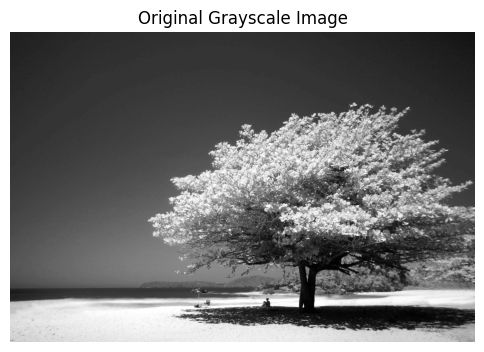

In [16]:
# Question 17:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_grayscale_image(path):
    """
    Reads an image from the given path and ensures it is grayscale.
    Returns a 2D numpy array of dtype uint8 with values [0, 255].
    """
    img = mpimg.imread(path)
    # If image is float in [0,1], convert to uint8
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
    # If it's RGB or RGBA, take just the first channel (the image is already grayscale)
    if img.ndim == 3:
        img = img[:, :, 0]
    return img

# Read and display the image
img = read_grayscale_image('data/image.jpg')
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [18]:
# Question 18:

height, width = img.shape
num_pixels = height * width

bits_per_pixel = 8
total_bits = num_pixels * bits_per_pixel

print(f"Image size: {height}×{width} = {num_pixels} pixels")
print(f"Fixed-length code: {bits_per_pixel} bits per pixel")
print(f"Total bits = {num_pixels} × {bits_per_pixel} = {total_bits} bits")


Image size: 1365×2048 = 2795520 pixels
Fixed-length code: 8 bits per pixel
Total bits = 2795520 × 8 = 22364160 bits


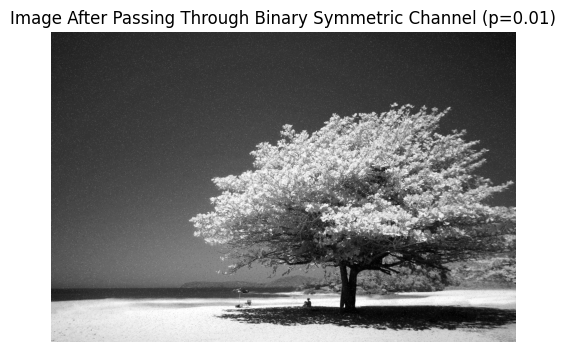

In [ ]:
# Question 19:

# Step 1: Flatten the image and convert each pixel to its 8-bit binary representation
height, width = img.shape
num_pixels = height * width
flat_pixels = img.reshape(-1, 1)
bit_array = np.unpackbits(flat_pixels, axis=1)  # shape: (num_pixels, 8)

# Step 2: Simulate a Binary Symmetric Channel with bit-flip probability 0.01
flip_probability = 0.01
random_flips = (np.random.rand(*bit_array.shape) < flip_probability).astype(np.uint8)
noisy_bits = bit_array ^ random_flips  # apply XOR to simulate flipping

# Step 3: Convert the corrupted bits back to uint8 pixel values
noisy_flat_pixels = np.packbits(noisy_bits, axis=1).flatten()
noisy_img = noisy_flat_pixels.reshape((height, width)).astype(np.uint8)

# Step 4: Display the decoded (corrupted) image
plt.figure(figsize=(6, 6))
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.title("Image After Passing Through Binary Symmetric Channel (p=0.01)")
plt.axis('off')
plt.show()

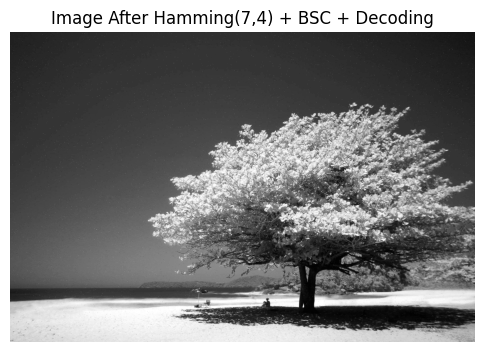

In [ ]:
# # Question 20:

# # Step 1: Convert image to flat bitstream (8 bits per pixel)
# height, width = img.shape
# flat_pixels = img.reshape(-1, 1)
# bit_array = np.unpackbits(flat_pixels, axis=1).flatten()

# # Step 2: Pad bits so total is divisible by 4
# pad_len = (4 - len(bit_array) % 4) % 4
# bit_array_padded = np.concatenate([bit_array, np.zeros(pad_len, dtype=np.uint8)])

# # Step 3: Hamming(7,4) encoder
# def hamming_encode_4bits(data):
#     d = data
#     p1 = d[0] ^ d[1] ^ d[3]
#     p2 = d[0] ^ d[2] ^ d[3]
#     p3 = d[1] ^ d[2] ^ d[3]
#     return np.array([p1, p2, d[0], p3, d[1], d[2], d[3]], dtype=np.uint8)

# blocks_4bit = bit_array_padded.reshape(-1, 4)
# encoded = np.array([hamming_encode_4bits(b) for b in blocks_4bit])
# encoded_bits = encoded.flatten()

# # Step 4: Simulate Binary Symmetric Channel with p = 0.01
# flip_p = 0.01
# noise = (np.random.rand(len(encoded_bits)) < flip_p).astype(np.uint8)
# received = encoded_bits ^ noise

# # Step 5: Hamming(7,4) decoder with 1-bit error correction
# def hamming_decode_7bits(code):
#     p1, p2, d0, p3, d1, d2, d3 = code
#     s1 = p1 ^ d0 ^ d1 ^ d3
#     s2 = p2 ^ d0 ^ d2 ^ d3
#     s3 = p3 ^ d1 ^ d2 ^ d3
#     syndrome = s1 * 1 + s2 * 2 + s3 * 4
#     corrected = code.copy()
#     if syndrome != 0:
#         corrected[syndrome - 1] ^= 1
#     return np.array([corrected[2], corrected[4], corrected[5], corrected[6]], dtype=np.uint8)

# blocks_7bit = received.reshape(-1, 7)
# decoded = np.array([hamming_decode_7bits(b) for b in blocks_7bit])
# decoded_bits = decoded.flatten()[:height * width * 8]  # remove padding

# # Step 6: Convert bits back to image
# bytes_array = decoded_bits.reshape(-1, 8)
# pixels = np.packbits(bytes_array, axis=1).flatten()
# recovered_img = pixels.reshape((height, width)).astype(np.uint8)

# # Step 7: Display final image
# plt.figure(figsize=(6, 6))
# plt.imshow(recovered_img, cmap='gray', vmin=0, vmax=255)
# plt.title("Image After Hamming(7,4) + BSC + Decoding")
# plt.axis('off')
# plt.show()


# Question 20:

import numpy as np

# Step 1: Convert image to bitstream
height, width = img.shape
flat_pixels = img.reshape(-1, 1)
bit_array = np.unpackbits(flat_pixels, axis=1).flatten()

# Step 2: Pad bits to multiple of 4
pad_len = (4 - len(bit_array) % 4) % 4
bit_array_padded = np.concatenate([bit_array, np.zeros(pad_len, dtype=np.uint8)])

# Step 3: Define the Hamming(7,4) encoding function
def hamming_encode_4bits(data):
    d = data
    p1 = d[0] ^ d[1] ^ d[3]
    p2 = d[0] ^ d[2] ^ d[3]
    p3 = d[1] ^ d[2] ^ d[3]
    return np.array([p1, p2, d[0], p3, d[1], d[2], d[3]], dtype=np.uint8)

# Step 4: Apply the encoding to all 4-bit blocks
blocks_4bit = bit_array_padded.reshape(-1, 4)
encoded_blocks = np.array([hamming_encode_4bits(b) for b in blocks_4bit])
encoded_bits = encoded_blocks.flatten()


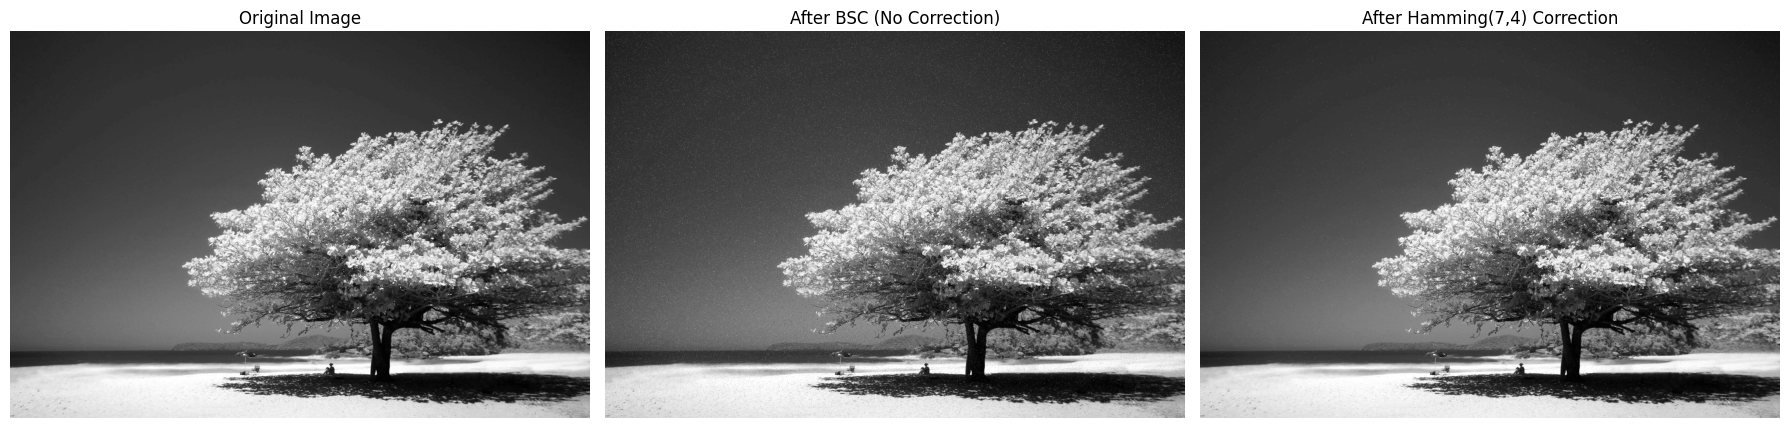

Pixel errors before correction: 215902


In [21]:

# Show original, noisy, and corrected images side-by-side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.title("After BSC (No Correction)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(recovered_img, cmap='gray', vmin=0, vmax=255)
plt.title("After Hamming(7,4) Correction")
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: pixel difference comparison
errors_before = np.sum(img != noisy_img)
errors_after = np.sum(img != recovered_img)

print("Pixel errors before correction:", errors_before)